In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pandas scikit-learn


In [ ]:
# Given growth rate (slope) from the linear regression
growth_rate = slope  # nm/h

# Set the critical nucleus size (1 nm)
critical_nucleus_size = 1.0  # nm

# Take the first available time from the data set (when the particle growth is observed)
initial_time = time_growth_phase[0]  # hours

# Take the particle size at that time
initial_particle_size = particle_size_growth_phase[0]  # nm

# Calculate the onset time using the formula
onset_time = initial_time - (initial_particle_size - critical_nucleus_size) / growth_rate

# Output the onset time
print(f"Onset time when particles form the stable critical nucleus of 1 nm: {onset_time:.2f} hours")


Onset time when particles form the stable critical nucleus of 1 nm: -2.11 hours


(82068, 45)
(24621, 45)
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     19301
           1       0.85      0.83      0.84      5320

    accuracy                           0.93     24621
   macro avg       0.90      0.89      0.90     24621
weighted avg       0.93      0.93      0.93     24621

Confusion Matrix:
[[18546   755]
 [  912  4408]]


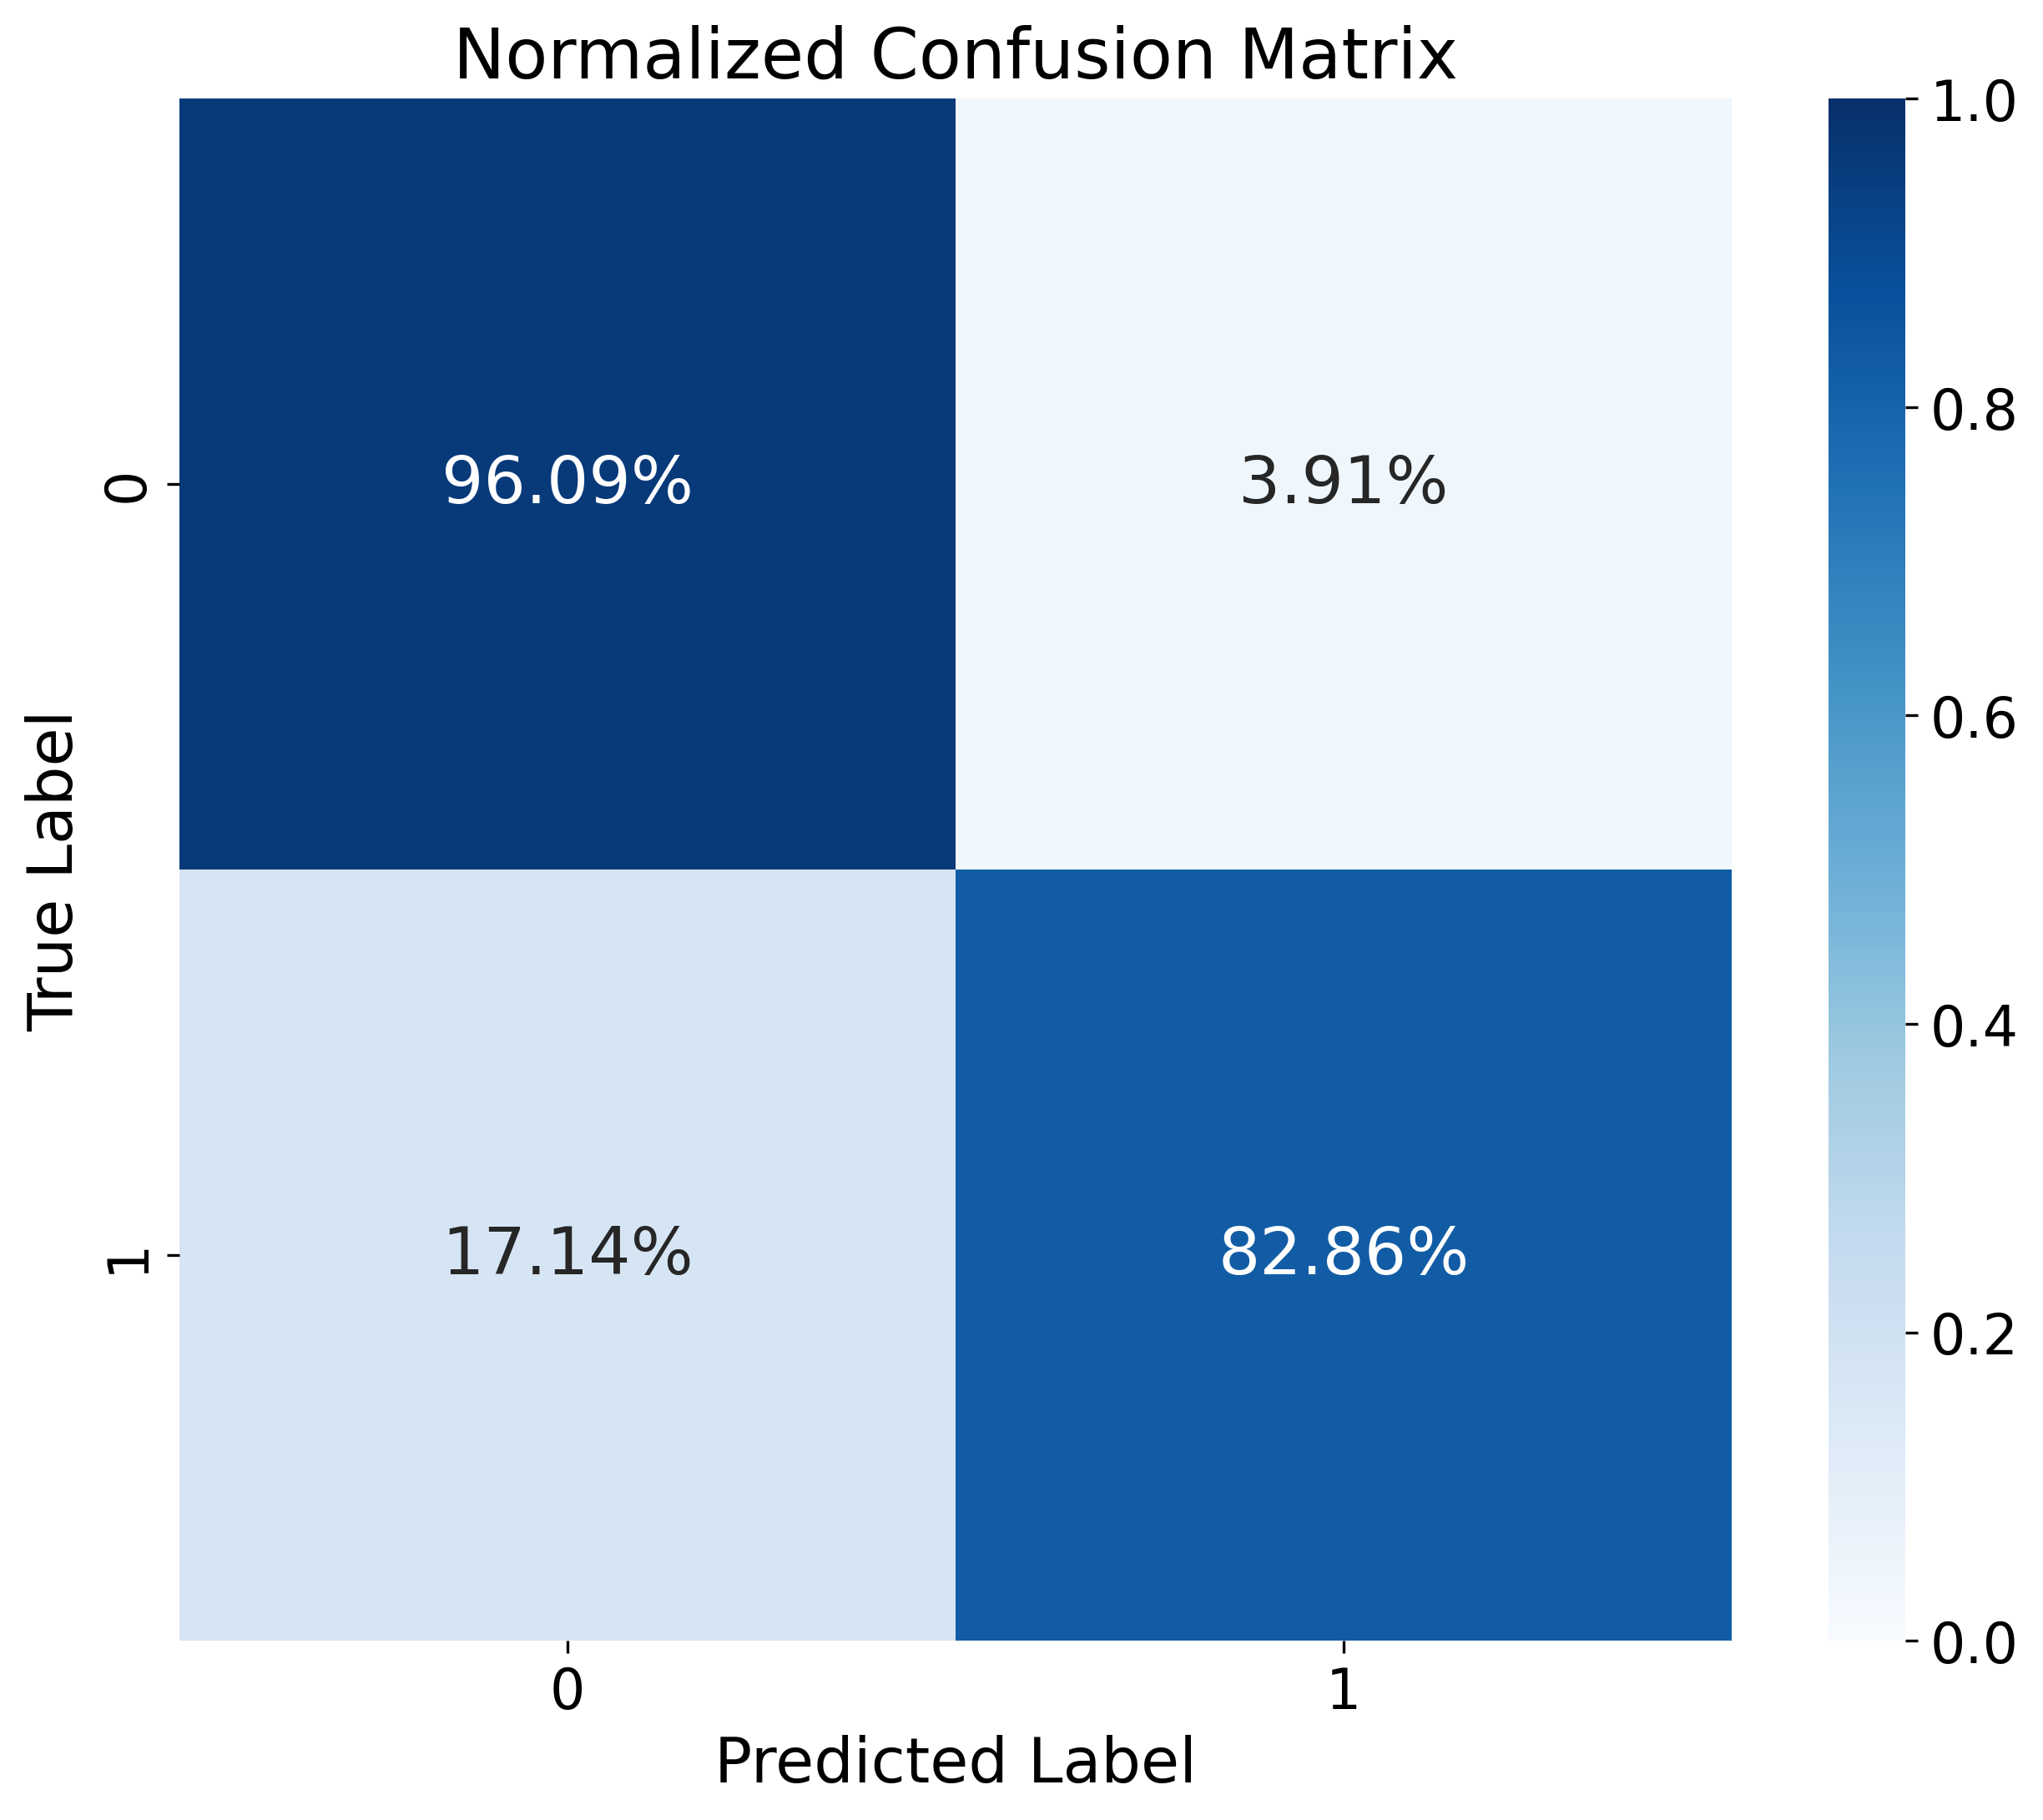

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Define features and target variable
X = df[['time_hours', 'Particle_Size_4.8nm', 'Particle_Size_5.0nm', 'Particle_Size_5.1nm', 'Particle_Size_5.3nm',
        'Particle_Size_5.5nm', 'Particle_Size_5.7nm', 'Particle_Size_5.9nm', 'Particle_Size_6.2nm',
        'Particle_Size_6.4nm', 'Particle_Size_6.6nm', 'Particle_Size_6.8nm', 'Particle_Size_7.1nm',
        'Particle_Size_7.4nm', 'Particle_Size_7.6nm', 'Particle_Size_7.9nm', 'Particle_Size_8.2nm',
        'Particle_Size_8.5nm', 'Particle_Size_8.8nm', 'Particle_Size_9.1nm', 'Particle_Size_9.5nm',
        'Particle_Size_9.8nm', 'Particle_Size_10.2nm', 'Particle_Size_10.6nm', 'Particle_Size_10.9nm',
        'Particle_Size_11.3nm', 'Particle_Size_11.8nm', 'Particle_Size_12.2nm', 'Particle_Size_12.6nm',
        'Particle_Size_13.1nm', 'Particle_Size_13.6nm', 'Particle_Size_14.1nm', 'Particle_Size_14.6nm',
        'Particle_Size_15.1nm', 'Particle_Size_15.7nm', 'Particle_Size_16.3nm', 'Particle_Size_16.8nm',
        'Particle_Size_17.5nm', 'Particle_Size_18.1nm', 'Particle_Size_18.8nm', 'Particle_Size_19.5nm',
        'Particle_Size_20.2nm', 'Particle_Size_20.9nm', 'Particle_Size_21.7nm', 'Particle_Size_22.5nm',
        ]]
y = df['flag3']
print(X.shape)

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
print(X_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
# Create the figure and axis
plt.figure(figsize=(10, 8), dpi=300)

# Calculate the normalized confusion matrix
normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
ax = sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2%", cmap="Blues", cbar=True, vmin=0, vmax=1)

# Customize the plot to make fonts larger
ax.set_title('Normalized Confusion Matrix', fontsize=20)  # Even larger title font
ax.set_xlabel('Predicted Label', fontsize=18)  # Larger x-axis label font
ax.set_ylabel('True Label', fontsize=18)  # Larger y-axis label font
ax.tick_params(axis='both', which='major', labelsize=16)  # Larger ticks

# Adjust annotation size
for t in ax.texts:
    t.set_fontsize(19)  # Larger annotation font

# Access the color bar object and set font size for its labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Set larger font size for color bar labels

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Define the data
data = {
    'Class': ['Overall', '0', '1'],
    'Precision': ['-', 0.95, 0.86],
    'Recall': ['-', 0.96, 0.82],
    'F1-score': ['-', 0.96, 0.84],
    'Support': ['16414', 12873, 3541]
}

# Create DataFrame
df = pd.DataFrame(data)

# Optionally, add accuracy as a separate row/column
accuracy_row = pd.DataFrame({'Class': ['Accuracy'], 'Precision': [0.93], 'Recall': [0.93], 'F1-score': [0.93], 'Support': ['Overall']})

# Append accuracy row
df = pd.concat([df, accuracy_row], ignore_index=True)

# Display the DataFrame
print(df)


      Class Precision Recall F1-score  Support
0   Overall         -      -        -    16414
1         0      0.95   0.96     0.96    12873
2         1      0.86   0.82     0.84     3541
3  Accuracy      0.93   0.93     0.93  Overall


In [ ]:
from sklearn.model_selection import cross_val_score

# Impute missing values for the entire dataset before cross-validation
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation and calculate the accuracy
# Note: cross_val_score returns the score for each test fold. Here we're using accuracy as the scoring metric.
cv_scores = cross_val_score(model, X_imputed, y, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print(f'Accuracy scores for each fold: {cv_scores}')

# Calculate the average accuracy across all folds
mean_cv_score = cv_scores.mean()
print(f'Mean cross-validation accuracy: {mean_cv_score:.2f}')

# Optionally, you can also calculate the standard deviation to see the variation between folds
std_cv_score = cv_scores.std()
print(f'Standard deviation of cross-validation accuracy: {std_cv_score:.2f}')


Accuracy scores for each fold: [0.92317534 0.93328866 0.93517729 0.91482362 0.90087126]
Mean cross-validation accuracy: 0.92
Standard deviation of cross-validation accuracy: 0.01


In [ ]:
pip install matplotlib

In [ ]:
print(np.sum(importances))  # This should output 1.0



1.0000000000000002


In [ ]:
# Sum of all feature importance scores
total_importance = np.sum(feature_importances)
print(f'Total sum of feature importances: {total_importance}')


Total sum of feature importances: 1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Convert 'date' column to datetime format and extract the year
df['year'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.year

# Define features and target variable
features = ['time_hours', 'Particle_Size_4.8nm', 'Particle_Size_5.0nm', 'Particle_Size_5.1nm', 'Particle_Size_5.3nm',
    'Particle_Size_5.5nm', 'Particle_Size_5.7nm', 'Particle_Size_5.9nm', 'Particle_Size_6.2nm',
    'Particle_Size_6.4nm', 'Particle_Size_6.6nm', 'Particle_Size_6.8nm', 'Particle_Size_7.1nm',
    'Particle_Size_7.4nm', 'Particle_Size_7.6nm', 'Particle_Size_7.9nm', 'Particle_Size_8.2nm',
    'Particle_Size_8.5nm', 'Particle_Size_8.8nm', 'Particle_Size_9.1nm', 'Particle_Size_9.5nm',
    'Particle_Size_9.8nm', 'Particle_Size_10.2nm', 'Particle_Size_10.6nm', 'Particle_Size_10.9nm',
    'Particle_Size_11.3nm', 'Particle_Size_11.8nm', 'Particle_Size_12.2nm', 'Particle_Size_12.6nm',
    'Particle_Size_13.1nm', 'Particle_Size_13.6nm', 'Particle_Size_14.1nm', 'Particle_Size_14.6nm',
    'Particle_Size_15.1nm', 'Particle_Size_15.7nm', 'Particle_Size_16.3nm', 'Particle_Size_16.8nm',
    'Particle_Size_17.5nm', 'Particle_Size_18.1nm', 'Particle_Size_18.8nm', 'Particle_Size_19.5nm',
    'Particle_Size_20.2nm', 'Particle_Size_20.9nm', 'Particle_Size_21.7nm', 'Particle_Size_22.5nm',]
X = df[features]
y = df['flag3']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Iterate only over the years of interest (2018-2023)
for test_year in range(2018, 2024):
    print(f"Testing on year: {test_year}")

    # Split the data based on the year
    X_train = X_imputed[df['year'] != test_year]
    y_train = y[df['year'] != test_year]
    X_test = X_imputed[df['year'] == test_year]
    y_test = y[df['year'] == test_year]

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set and calculate the accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {test_year}: {accuracy:.2f}\n')

    # Optionally, print classification report and confusion matrix for each year
    # print(classification_report(y_test, y_pred))
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # print(f"Confusion Matrix for {test_year}:")
    # print(conf_matrix, "\n")


Testing on year: 2018
Accuracy for 2018: 0.93

Testing on year: 2019
Accuracy for 2019: 0.93

Testing on year: 2020
Accuracy for 2020: 0.92

Testing on year: 2021
Accuracy for 2021: 0.92

Testing on year: 2022
Accuracy for 2022: 0.92

Testing on year: 2023
Accuracy for 2023: 0.91




Fold 1 Accuracy: 0.9299
Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6435
           1       0.85      0.82      0.84      1772

    accuracy                           0.93      8207
   macro avg       0.90      0.89      0.90      8207
weighted avg       0.93      0.93      0.93      8207


Fold 2 Accuracy: 0.9335
Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6438
           1       0.86      0.83      0.84      1769

    accuracy                           0.93      8207
   macro avg       0.91      0.89      0.90      8207
weighted avg       0.93      0.93      0.93      8207


Fold 3 Accuracy: 0.9362
Classification Report for Fold 3:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6428
           1       0.85      0.85      0.85      1779

    a

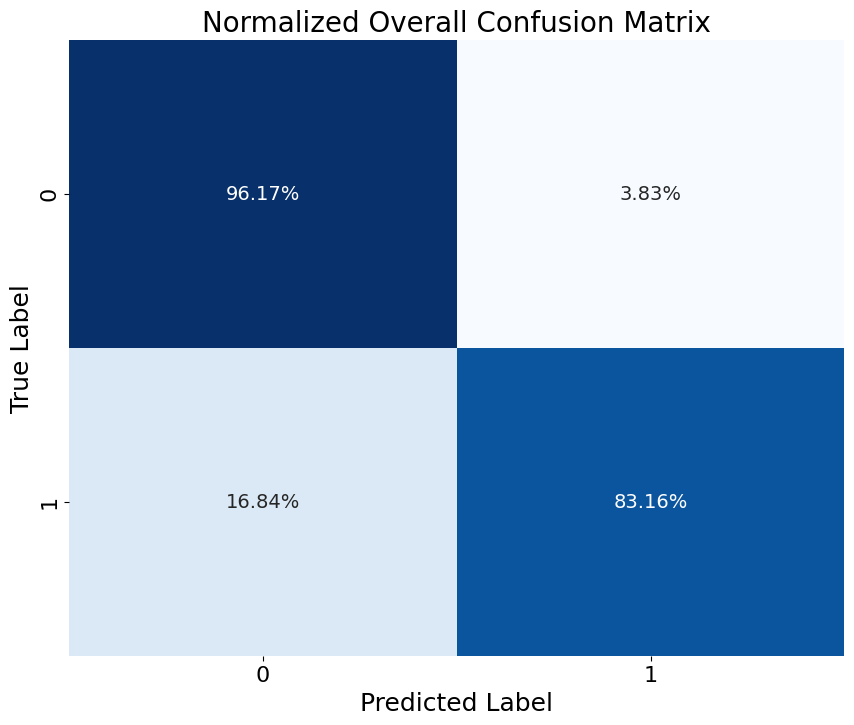

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Define features and target variable
X = df[['time_hours', 'Particle_Size_4.8nm', 'Particle_Size_5.0nm', 'Particle_Size_5.1nm', 'Particle_Size_5.3nm',
        'Particle_Size_5.5nm', 'Particle_Size_5.7nm', 'Particle_Size_5.9nm', 'Particle_Size_6.2nm',
        'Particle_Size_6.4nm', 'Particle_Size_6.6nm', 'Particle_Size_6.8nm', 'Particle_Size_7.1nm',
        'Particle_Size_7.4nm', 'Particle_Size_7.6nm', 'Particle_Size_7.9nm', 'Particle_Size_8.2nm',
        'Particle_Size_8.5nm', 'Particle_Size_8.8nm', 'Particle_Size_9.1nm', 'Particle_Size_9.5nm',
        'Particle_Size_9.8nm', 'Particle_Size_10.2nm', 'Particle_Size_10.6nm', 'Particle_Size_10.9nm',
        'Particle_Size_11.3nm', 'Particle_Size_11.8nm', 'Particle_Size_12.2nm', 'Particle_Size_12.6nm',
        'Particle_Size_13.1nm', 'Particle_Size_13.6nm', 'Particle_Size_14.1nm', 'Particle_Size_14.6nm',
        'Particle_Size_15.1nm', 'Particle_Size_15.7nm', 'Particle_Size_16.3nm', 'Particle_Size_16.8nm',
        'Particle_Size_17.5nm', 'Particle_Size_18.1nm', 'Particle_Size_18.8nm', 'Particle_Size_19.5nm',
        'Particle_Size_20.2nm', 'Particle_Size_20.9nm', 'Particle_Size_21.7nm', 'Particle_Size_22.5nm']]
y = df['flag3']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up KFold cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# To store accuracy for each fold and collect confusion matrices
accuracies = []
confusion_matrices = []

# Perform 10-fold cross-validation
fold = 1
for train_index, test_index in kf.split(X_imputed):
    # Split the data into training and test sets for the current fold
    X_train_fold, X_test_fold = X_imputed[train_index], X_imputed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    model.fit(X_train_fold, y_train_fold)

    # Predict on the test data
    y_pred_fold = model.predict(X_test_fold)

    # Calculate accuracy for the current fold
    accuracy = accuracy_score(y_test_fold, y_pred_fold)
    accuracies.append(accuracy)

    # Calculate confusion matrix and store it
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    confusion_matrices.append(conf_matrix)

    # Print results for each fold
    print(f"\nFold {fold} Accuracy: {accuracy:.4f}")
    print(f"Classification Report for Fold {fold}:\n{classification_report(y_test_fold, y_pred_fold)}")
    fold += 1

# Calculate the mean and standard deviation of accuracy across all folds
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)

# Print the overall accuracy results
print(f'\nOverall 10-Fold Cross-Validation Accuracy: Mean = {mean_accuracy:.4f}, Std = {std_accuracy:.4f}')

# Sum confusion matrices to get the overall confusion matrix
overall_conf_matrix = np.sum(confusion_matrices, axis=0)

# Plot the normalized overall confusion matrix as a heatmap
plt.figure(figsize=(10, 8))

# Calculate the normalized confusion matrix
normalized_conf_matrix = overall_conf_matrix / overall_conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
ax = sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2%", cmap="Blues", cbar=False)

# Customize the plot
ax.set_title('Normalized Overall Confusion Matrix', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=18)
ax.set_ylabel('True Label', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust annotation size
for t in ax.texts:
    t.set_fontsize(14)

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Define features and target variable
X = df[['time_hours', 'Particle_Size_4.8nm', 'Particle_Size_5.0nm', 'Particle_Size_5.1nm', 'Particle_Size_5.3nm',
        'Particle_Size_5.5nm', 'Particle_Size_5.7nm', 'Particle_Size_5.9nm', 'Particle_Size_6.2nm',
        'Particle_Size_6.4nm', 'Particle_Size_6.6nm', 'Particle_Size_6.8nm', 'Particle_Size_7.1nm',
        'Particle_Size_7.4nm', 'Particle_Size_7.6nm', 'Particle_Size_7.9nm', 'Particle_Size_8.2nm',
        'Particle_Size_8.5nm', 'Particle_Size_8.8nm', 'Particle_Size_9.1nm', 'Particle_Size_9.5nm',
        'Particle_Size_9.8nm', 'Particle_Size_10.2nm', 'Particle_Size_10.6nm', 'Particle_Size_10.9nm',
        'Particle_Size_11.3nm', 'Particle_Size_11.8nm', 'Particle_Size_12.2nm', 'Particle_Size_12.6nm',
        'Particle_Size_13.1nm', 'Particle_Size_13.6nm', 'Particle_Size_14.1nm', 'Particle_Size_14.6nm',
        'Particle_Size_15.1nm', 'Particle_Size_15.7nm', 'Particle_Size_16.3nm', 'Particle_Size_16.8nm',
        'Particle_Size_17.5nm', 'Particle_Size_18.1nm', 'Particle_Size_18.8nm', 'Particle_Size_19.5nm',
        'Particle_Size_20.2nm', 'Particle_Size_20.9nm', 'Particle_Size_21.7nm', 'Particle_Size_22.5nm']]
y = df['flag3']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Initialize KFold cross-validation with 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# To store feature importances for each fold
feature_importances_per_fold = []

# Perform 10-fold cross-validation
for train_index, test_index in kf.split(X_imputed):
    # Split the data into training and test sets for the current fold
    X_train_fold, X_test_fold = X_imputed[train_index], X_imputed[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training data
    model.fit(X_train_fold, y_train_fold)

    # Store the feature importances for the current fold
    feature_importances_per_fold.append(model.feature_importances_)

# Calculate mean feature importances across all folds
mean_importances = np.mean(feature_importances_per_fold, axis=0)

# Store the feature names
feature_names = X.columns


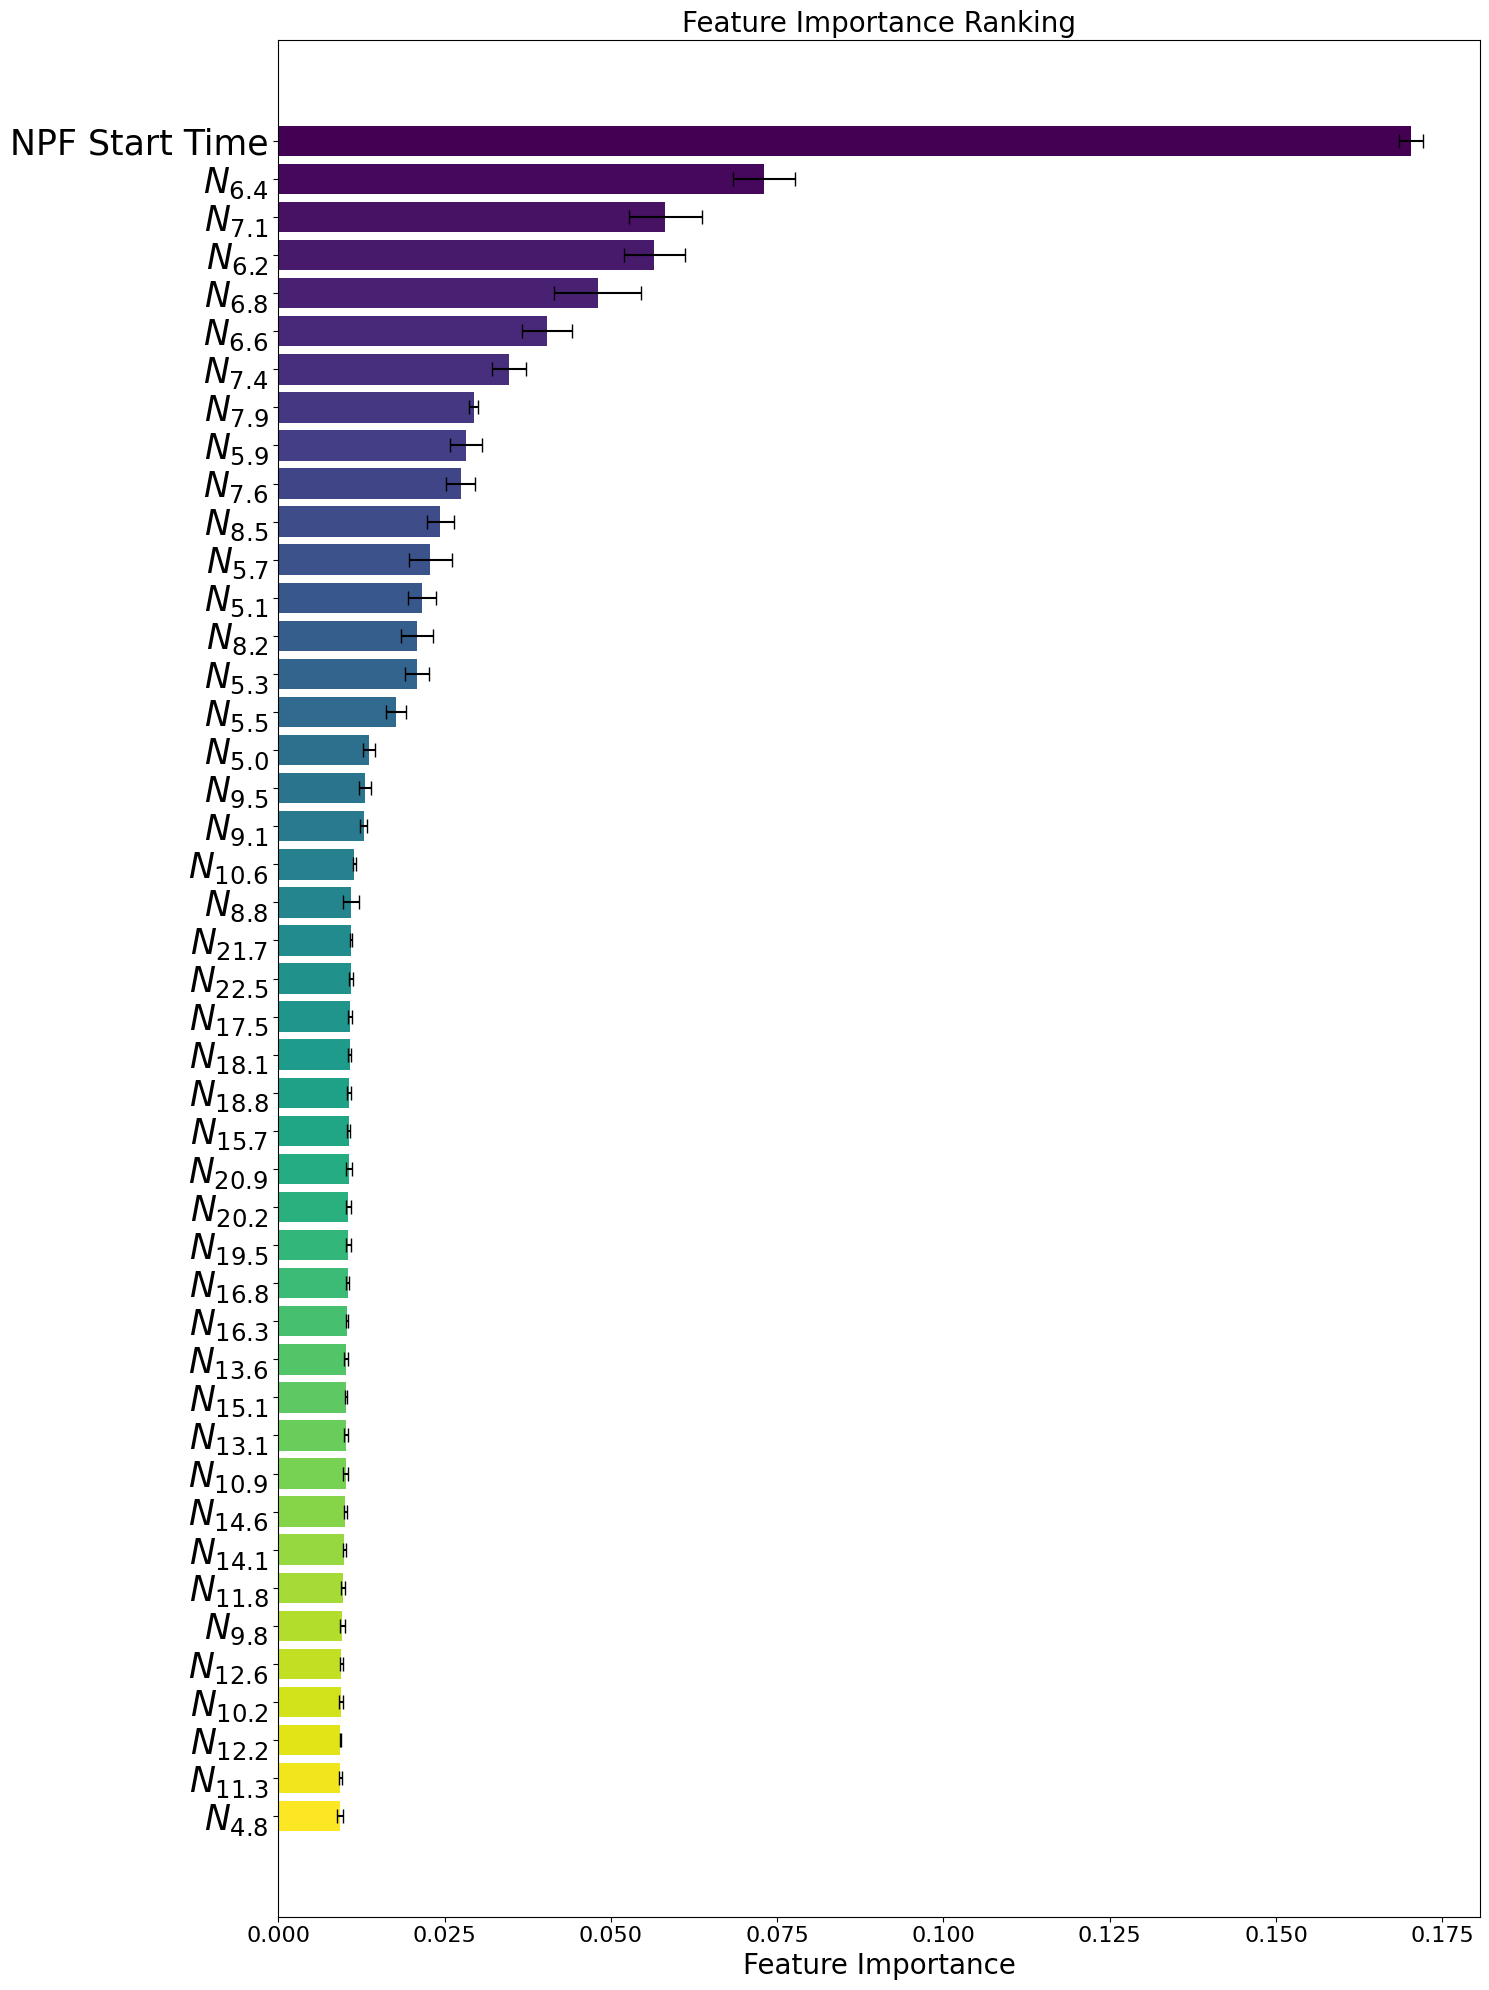

In [ ]:
# Calculate mean and standard deviation of feature importances across all folds
mean_importances = np.mean(feature_importances_per_fold, axis=0)
std_importances = np.std(feature_importances_per_fold, axis=0)

# Store the feature names
feature_names = X.columns
import matplotlib.pyplot as plt

# Sort the feature importances in descending order by reversing the indices
indices = np.argsort(mean_importances)[::-1]

# Create formatted labels for the feature names
formatted_labels = []
for name in feature_names:
    if name == 'time_hours':
        formatted_label = 'NPF Start Time'
    elif 'Particle_Size_' in name:
        size = name.split('_')[2].replace('nm', '')  # Extract size and remove 'nm'
        formatted_label = f'$N_{{{size}}}$'  # Format with LaTeX for subscript
    else:
        formatted_label = name  # Use the name as is if it doesn't fit other rules
    formatted_labels.append(formatted_label)

# Map sorted indices to formatted labels
names = [formatted_labels[i] for i in indices]

# Create a plot
plt.figure(figsize=(15, 20))
plt.title("Feature Importance Ranking", fontsize=20)

# Generate colors using the viridis colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(indices)))

# Plot the feature importances with error bars
plt.barh(
    range(len(names)),
    [mean_importances[i] for i in indices],
    xerr=[std_importances[i] for i in indices],  # Add error bars using standard deviation
    color=colors,
    capsize=5  # Add caps to the error bars
)

# Set y-ticks with the sorted group names
plt.yticks(range(len(names)), names, fontsize=25, rotation=0)
plt.tick_params(axis='x', labelsize=16)  # Increase x-tick font size for better visibility
plt.gca().invert_yaxis()  # Display the most important features at the top
plt.xlabel('Feature Importance', fontsize=20)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


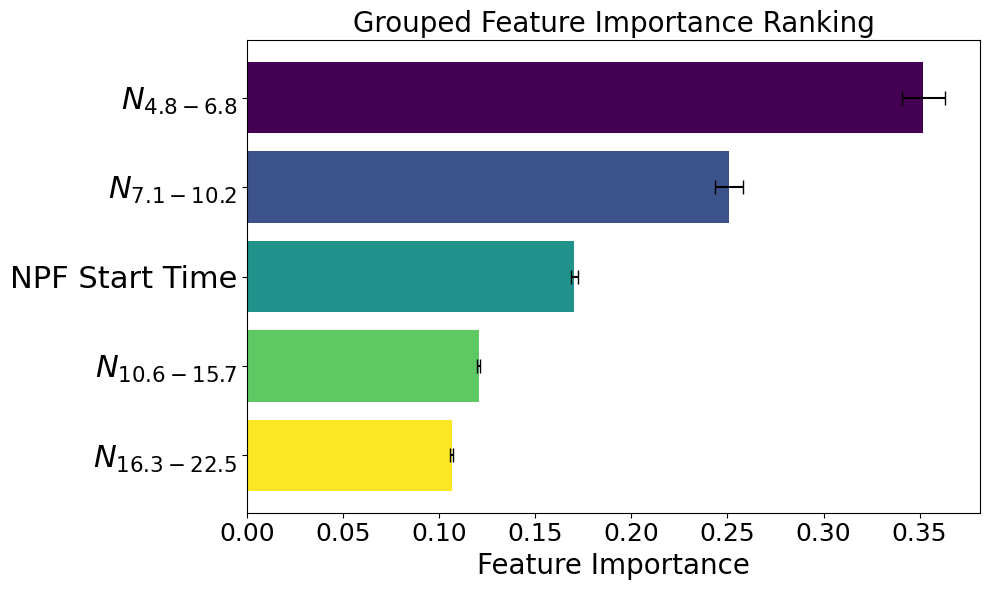

In [ ]:
# Calculate mean and standard deviation of feature importances across all folds
mean_importances = np.mean(feature_importances_per_fold, axis=0)
std_importances = np.std(feature_importances_per_fold, axis=0)

# Store the feature names
feature_names = X.columns

import numpy as np
import matplotlib.pyplot as plt

# Initialize sums for the five groups (mean importances and standard deviations)
grouped_importances = {
    'NPF Start Time': {'mean': 0, 'std': 0},
    '$N_{4.8-6.8}$': {'mean': 0, 'std': 0},
    '$N_{7.1-10.2}$': {'mean': 0, 'std': 0},
    '$N_{10.6-15.7}$': {'mean': 0, 'std': 0},
    '$N_{16.3-22.5}$': {'mean': 0, 'std': 0}
}

# Iterate over feature names to accumulate importances and standard deviations for each group
for i, name in enumerate(feature_names):
    if name == 'time_hours':
        grouped_importances['NPF Start Time']['mean'] += mean_importances[i]
        grouped_importances['NPF Start Time']['std'] += std_importances[i] ** 2
    elif 'Particle_Size_' in name:
        size = name.split('_')[2].replace('nm', '')  # Extract size and remove 'nm'
        size_range = float(size)  # Convert to float for comparison

        if 4.8 <= size_range <= 6.8:
            grouped_importances['$N_{4.8-6.8}$']['mean'] += mean_importances[i]
            grouped_importances['$N_{4.8-6.8}$']['std'] += std_importances[i] ** 2
        elif 7.1 <= size_range <= 10.2:
            grouped_importances['$N_{7.1-10.2}$']['mean'] += mean_importances[i]
            grouped_importances['$N_{7.1-10.2}$']['std'] += std_importances[i] ** 2
        elif 10.6 <= size_range <= 15.7:
            grouped_importances['$N_{10.6-15.7}$']['mean'] += mean_importances[i]
            grouped_importances['$N_{10.6-15.7}$']['std'] += std_importances[i] ** 2
        elif 16.3 <= size_range <= 22.5:
            grouped_importances['$N_{16.3-22.5}$']['mean'] += mean_importances[i]
            grouped_importances['$N_{16.3-22.5}$']['std'] += std_importances[i] ** 2

# Convert accumulated variances to standard deviations
for group in grouped_importances:
    grouped_importances[group]['std'] = np.sqrt(grouped_importances[group]['std'])

# Sort the groups by their summed feature importance in descending order
sorted_groups = sorted(grouped_importances.items(), key=lambda x: x[1]['mean'], reverse=True)

# Separate the sorted group names, mean values, and standard deviations
group_names = [item[0] for item in sorted_groups]
group_values = [item[1]['mean'] for item in sorted_groups]
group_std = [item[1]['std'] for item in sorted_groups]

# Plotting the summed feature importances for the five groups with error bars
plt.figure(figsize=(10, 6))
plt.title("Grouped Feature Importance Ranking", fontsize=20)

# Create a horizontal bar chart with sorted values and error bars
colors = plt.cm.viridis(np.linspace(0, 1, len(group_names)))
plt.barh(range(len(group_names)), group_values, xerr=group_std, color=colors, capsize=5)

# Set y-ticks with the sorted group names
plt.yticks(range(len(group_names)), group_names, fontsize=22)
plt.tick_params(axis='x', labelsize=18)  # Increase x-tick font size for better visibility
plt.gca().invert_yaxis()  # Display the most important group at the top
plt.xlabel('Feature Importance', fontsize=20)

# Show the plot with tight layout
plt.tight_layout()
plt.show()


## for SI variables confusion metrix

(82068, 11)
(24621, 11)
Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     19301
           1       0.95      0.92      0.94      5320

    accuracy                           0.97     24621
   macro avg       0.97      0.95      0.96     24621
weighted avg       0.97      0.97      0.97     24621

Confusion Matrix:
[[19062   239]
 [  416  4904]]


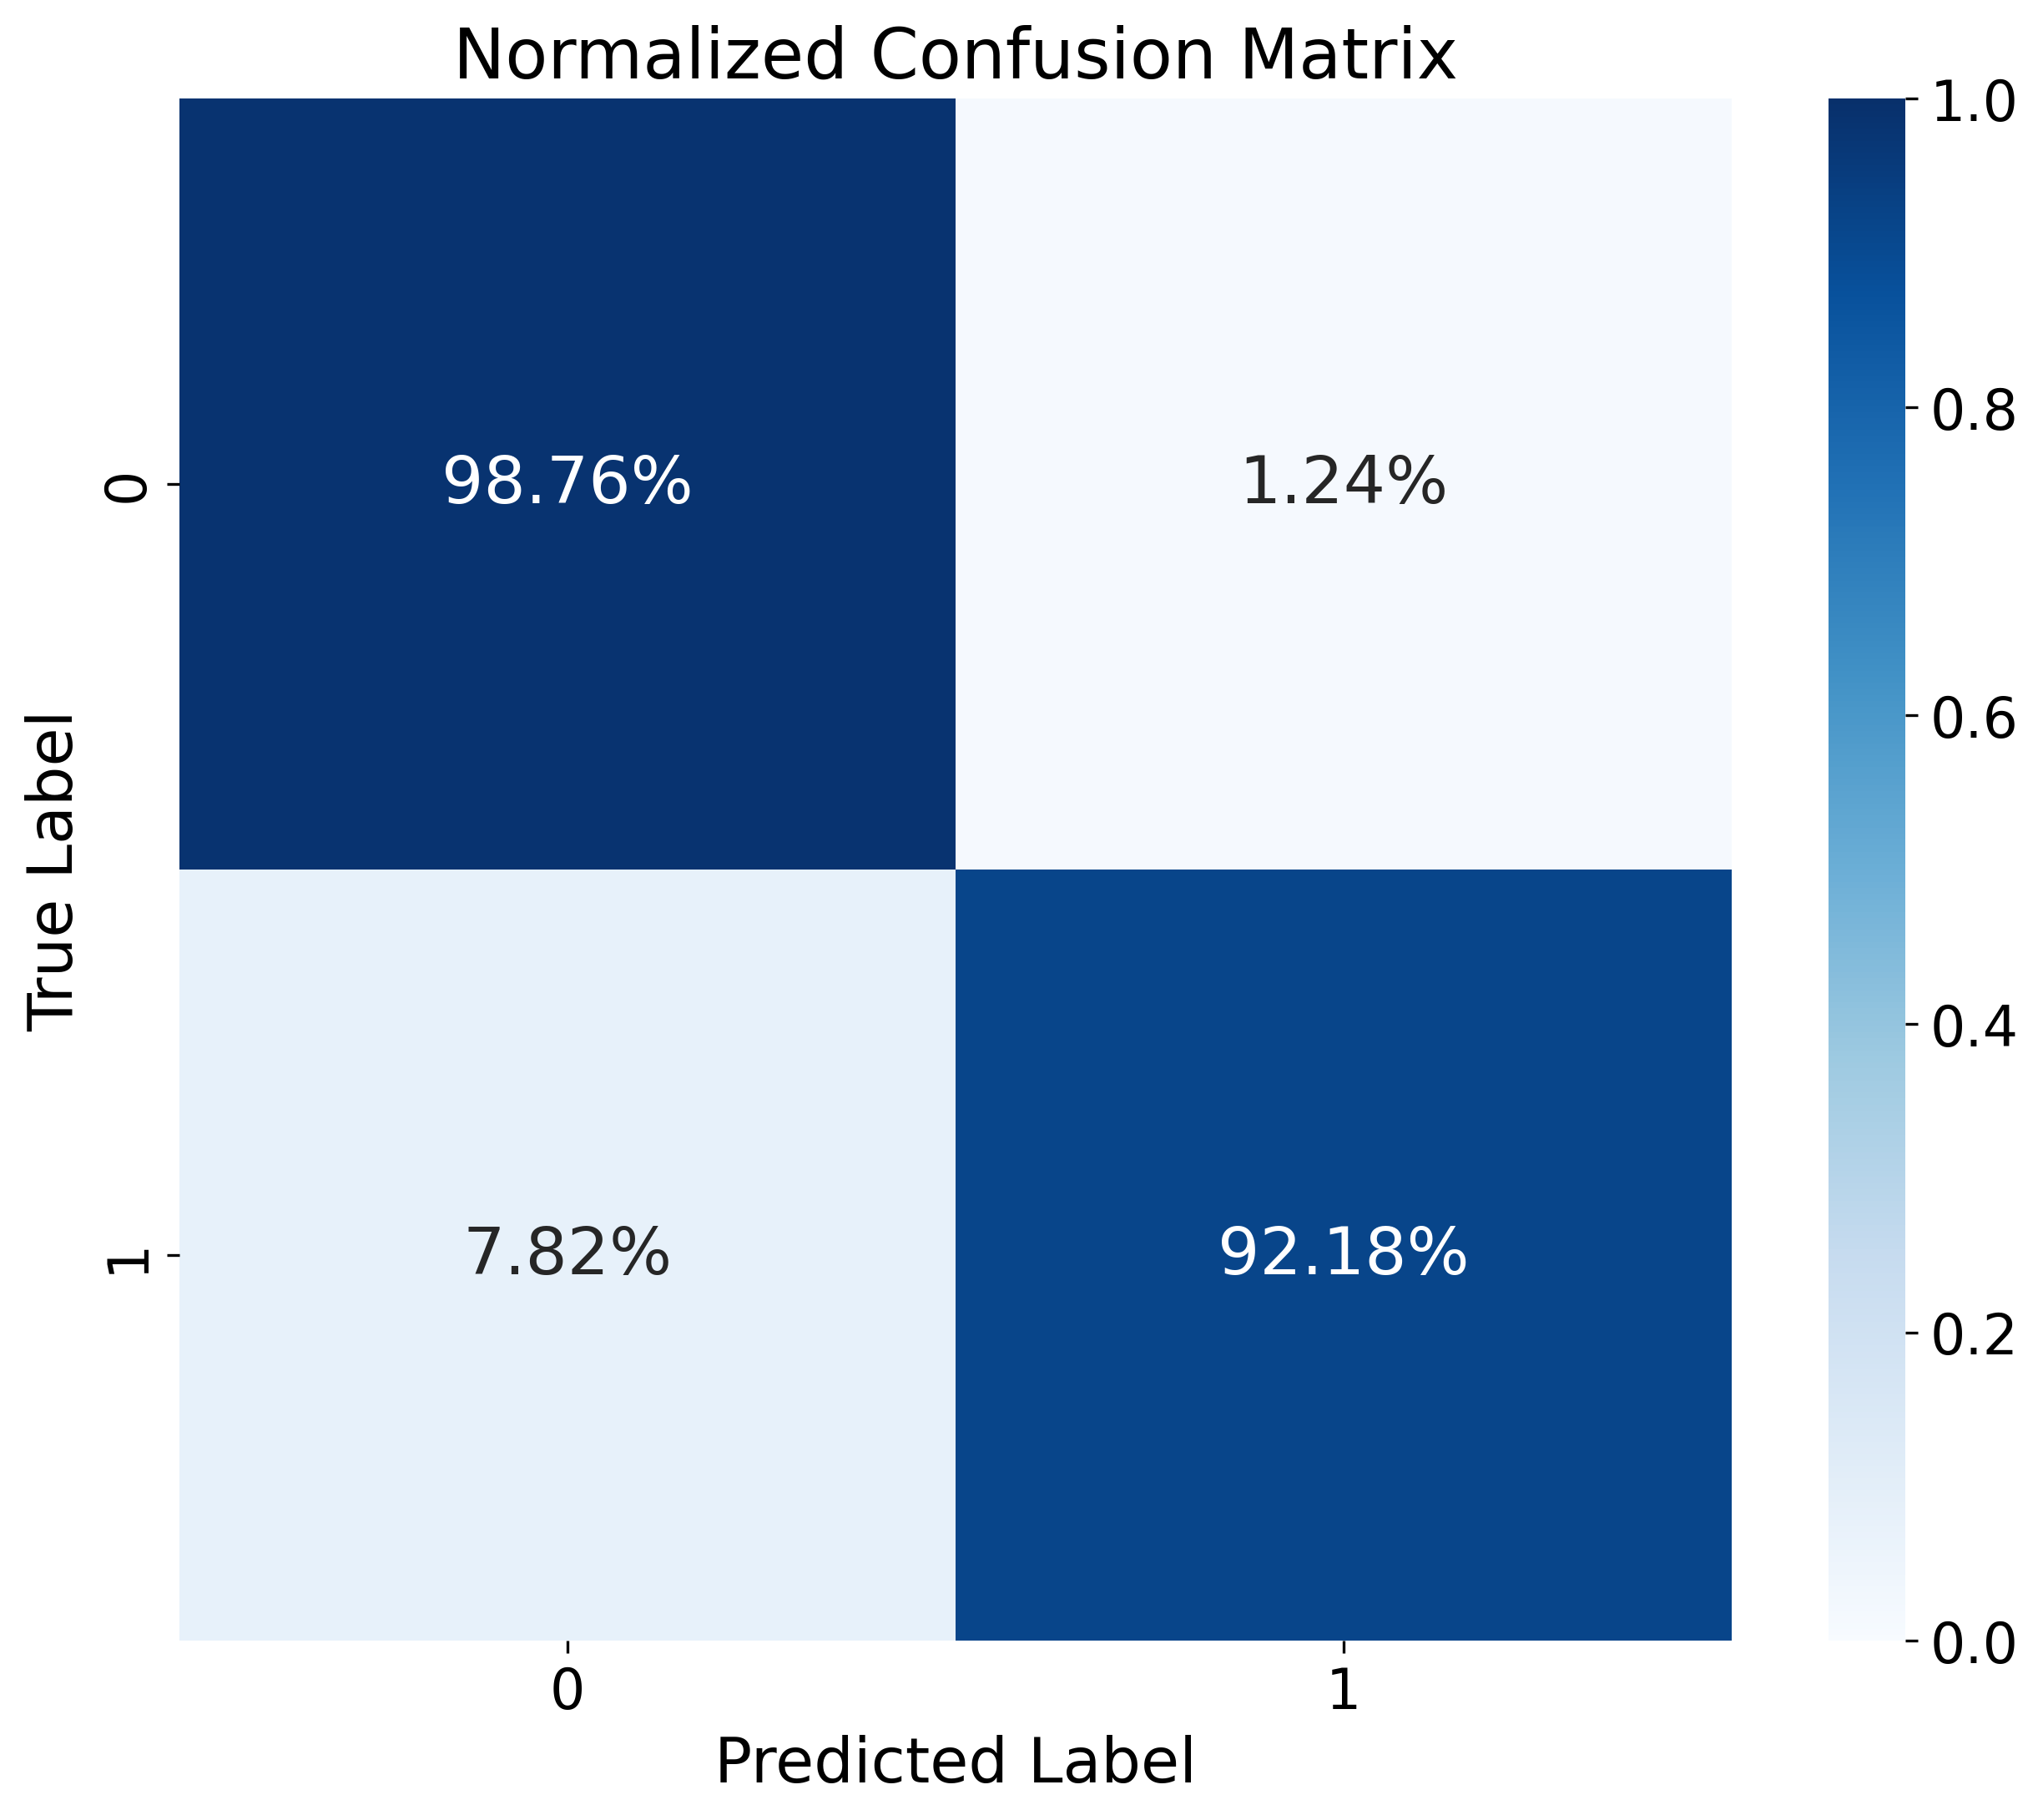

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Define features and target variable
X = df[['bl_height_1_interp', 'total_organics_interp', 'sulfate_interp', 'nitrate_interp', 'rh_ambient_interp',
        'temperature_ambient_interp', 'wind_direction_interp', 'wind_speed_interp', 'total_SA_conc_smps_interp',
        'turbulent_kinetic_energy_interp', 'BestEstimate_down_short_hemisp_interp'
]]

y = df['flag3']
print(X.shape)

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
print(X_test.shape)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
# Create the figure and axis
plt.figure(figsize=(10, 8), dpi=300)

# Calculate the normalized confusion matrix
normalized_conf_matrix = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the heatmap
ax = sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2%", cmap="Blues", cbar=True, vmin=0, vmax=1)

# Customize the plot to make fonts larger
ax.set_title('Normalized Confusion Matrix', fontsize=20)  # Even larger title font
ax.set_xlabel('Predicted Label', fontsize=18)  # Larger x-axis label font
ax.set_ylabel('True Label', fontsize=18)  # Larger y-axis label font
ax.tick_params(axis='both', which='major', labelsize=16)  # Larger ticks

# Adjust annotation size
for t in ax.texts:
    t.set_fontsize(19)  # Larger annotation font

# Access the color bar object and set font size for its labels
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Set larger font size for color bar labels

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv')

# Convert 'date' column to datetime format and extract the year
df['year'] = pd.to_datetime(df['date'], format='%Y%m%d').dt.year

# Define features and target variable
features = ['bl_height_1_interp', 'total_organics_interp', 'sulfate_interp', 'nitrate_interp', 'rh_ambient_interp',
            'temperature_ambient_interp', 'wind_direction_interp', 'wind_speed_interp', 'total_SA_conc_smps_interp',
            'turbulent_kinetic_energy_interp', 'BestEstimate_down_short_hemisp_interp']
X = df[features]
y = df['flag3']

# Impute missing values using the median for each column
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Iterate only over the years of interest (2018-2023)
for test_year in range(2018, 2024):
    print(f"Testing on year: {test_year}")

    # Split the data based on the year
    X_train = X_imputed[df['year'] != test_year]
    y_train = y[df['year'] != test_year]
    X_test = X_imputed[df['year'] == test_year]
    y_test = y[df['year'] == test_year]

    # Initialize and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the test set and calculate the accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {test_year}: {accuracy:.2f}\n')

    # Optionally, print classification report and confusion matrix for each year
    # print(classification_report(y_test, y_pred))
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # print(f"Confusion Matrix for {test_year}:")
    # print(conf_matrix, "\n")


Testing on year: 2018
Accuracy for 2018: 0.87

Testing on year: 2019
Accuracy for 2019: 0.87

Testing on year: 2020
Accuracy for 2020: 0.87

Testing on year: 2021
Accuracy for 2021: 0.85

Testing on year: 2022
Accuracy for 2022: 0.86

Testing on year: 2023
Accuracy for 2023: 0.84

